<a href="https://colab.research.google.com/github/rugveddarwhekar/llm-colab/blob/main/langchain_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langchain & RAG with Google Gemini

## Basic setup

In [ ]:
from google.colab import userdata
userdata.get('GEMINI_API_KEY')

In [6]:
!pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf
!pip install langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 16.0 MB/s eta 0:00:00


In [36]:
from IPython.display import display
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '*')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Text Generation without Langchain

In [11]:
import google.generativeai as genai
from google.colab import userdata
import os
GOOGLE_API_KEY = userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model = genai.GenerativeModel(model_name = "gemini-1.5-flash")
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
response = model.generate_content('Why are LLMs useful?')
to_markdown(response.text)

> LLMs (Large Language Models) are useful for a variety of reasons, ranging from assisting with daily tasks to driving cutting-edge research. Here are some key areas where they excel:
> 
> **1. Text Generation and Manipulation:**
> 
> * **Content Creation:** Generating creative writing, articles, social media posts, marketing materials, and more.
> * **Translation:** Translating text between languages, improving accuracy and fluency.
> * **Summarization:** Condensing large amounts of text into concise summaries.
> * **Paraphrasing:** Rewording text to improve clarity or avoid plagiarism.
> * **Code Generation:** Creating code in various programming languages based on natural language prompts.
> 
> **2. Information Retrieval and Understanding:**
> 
> * **Answering Questions:** Providing informative answers to a wide range of questions based on vast training data.
> * **Text Classification:** Categorizing text into different topics or sentiments.
> * **Sentiment Analysis:** Determining the emotional tone of text, identifying positive, negative, or neutral sentiment.
> * **Knowledge Extraction:** Identifying and extracting key information from text.
> 
> **3. Conversational AI:**
> 
> * **Chatbots:** Creating interactive and engaging conversational agents for customer service, personal assistants, and entertainment.
> * **Dialogue Systems:** Building natural and human-like dialogue systems for various applications.
> * **Virtual Assistants:** Providing personalized assistance with tasks, scheduling, and information retrieval.
> 
> **4. Research and Development:**
> 
> * **Drug Discovery:** Identifying potential drug candidates and analyzing biological data.
> * **Material Science:** Simulating and predicting the properties of new materials.
> * **Language Learning:** Enhancing language learning experiences and providing personalized feedback.
> 
> **5. Other Applications:**
> 
> * **Education:** Providing personalized learning experiences, creating interactive quizzes, and generating educational content.
> * **Entertainment:** Generating stories, poems, and creative content for games, movies, and other forms of entertainment.
> * **Accessibility:** Helping people with disabilities access information and communicate effectively.
> 
> **Benefits of LLMs:**
> 
> * **Efficiency:** Automate tasks that are time-consuming for humans.
> * **Scale:** Process large amounts of data and generate responses at scale.
> * **Personalization:** Provide customized experiences and content based on individual needs.
> * **Innovation:** Enable new possibilities in various fields and drive technological advancements.
> 
> However, it is important to be aware of the limitations of LLMs, including potential biases, ethical concerns, and the need for responsible development and deployment. 


## Using Langchain to access Gemini

### Text

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model = "gemini-1.5-flash", google_api_key = GOOGLE_API_KEY)

In [ ]:
result = llm.invoke("Why are LLMs useful?")
to_markdown(result.content)

> Large Language Models (LLMs) are useful for a wide range of applications because they possess several unique capabilities:
> 
> **1. Natural Language Understanding and Generation:**
> 
> * **Text Summarization:** LLMs can condense large amounts of text into concise summaries, making it easier to grasp key information.
> * **Translation:** They can translate text between languages with high accuracy, breaking down language barriers.
> * **Question Answering:** LLMs can understand complex questions and provide accurate and relevant answers from vast amounts of information.
> * **Dialogue Generation:** They can engage in natural-sounding conversations, making them ideal for chatbots and virtual assistants.
> * **Content Creation:** LLMs can generate creative content like poems, scripts, and articles, enhancing human creativity.
> 
> **2. Data Analysis and Insights:**
> 
> * **Sentiment Analysis:** LLMs can analyze text to understand the sentiment (positive, negative, neutral) expressed, helping businesses understand customer feedback.
> * **Topic Modeling:** They can identify key themes and topics within large datasets, uncovering hidden patterns and insights.
> * **Data Extraction:** LLMs can extract specific information from unstructured text, automating data collection and analysis.
> 
> **3. Automation and Efficiency:**
> 
> * **Code Generation:** LLMs can generate code in various programming languages, streamlining development processes.
> * **Document Summarization and Analysis:** They can automate the process of summarizing and analyzing large volumes of documents, saving time and effort.
> * **Customer Service Automation:** LLMs can power chatbots that handle basic customer inquiries, freeing up human agents for more complex issues.
> 
> **4. Personalized Experiences:**
> 
> * **Recommendation Systems:** LLMs can analyze user data and preferences to provide personalized recommendations for products, services, and content.
> * **Content Personalization:** LLMs can tailor content to individual users based on their interests and preferences, enhancing engagement.
> 
> **5. Accessibility and Inclusivity:**
> 
> * **Language Accessibility:** LLMs can break down language barriers, making information accessible to a wider audience.
> * **Assistive Technology:** They can be used to develop assistive technologies like speech-to-text and text-to-speech software, enhancing accessibility for individuals with disabilities.
> 
> **However, it's important to remember that LLMs also have limitations:**
> 
> * **Bias and Ethical Concerns:** LLMs can reflect and amplify biases present in the data they are trained on, leading to potential ethical issues.
> * **Lack of Common Sense and Reasoning:** LLMs may struggle with tasks requiring common sense reasoning or understanding of context.
> * **Data Dependency:** LLMs rely heavily on the quality and diversity of training data, which can impact their performance and accuracy.
> 
> Overall, LLMs are powerful tools with the potential to revolutionize various industries and aspects of our lives. However, it's crucial to be aware of their limitations and use them responsibly.


### Image

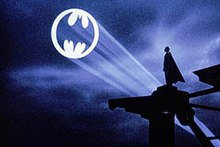

In [1]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [18]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model = "gemini-1.5-flash", google_api_key = GOOGLE_API_KEY)

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Write a short caption of the image for posting on social media."
        },
        {
            "type": "image_url",
            "image_url": "/content/image.jpg"
        },
    ]
)
llm.invoke([message])

AIMessage(content='"I\'m Batman." - The Dark Knight. 🦇 #Batman #Gotham #DCComics #Superhero #Iconic', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-0ae4974a-4161-42d6-8761-b0c31efd5faf-0', usage_metadata={'input_tokens': 272, 'output_tokens': 25, 'total_tokens': 297})

## Chat with Documents using RAG (Retrieval Augment Generation)

In [21]:
!sudo apt -y -qq install tesseract-ocr libtesseract-dev
!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig
!pip install langchain
!pip install langchain-community

libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.6 MB/s eta 0:00:00


In [22]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA

warnings.filterwarnings("ignore")

In [23]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [24]:
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key=GOOGLE_API_KEY, temperature=0.2, convert_system_message_to_human=True)

### Extract Text from PDF

In [27]:
pdf_loader = PyPDFLoader("/content/gen-ai.pdf")
pages = pdf_loader.load_and_split()
print(pages[4].page_content)

Midjourney accepts both modalities to generate images. To
this end, generative AI models can also be grouped intounimodal and multimodal models. Unimodal models take
instructions from the same input type as their output (e.g.,
text). On the other hand, multimodal models can take inputfrom different sources and generate output in various
forms. Multimodal models exist across a variety of data
modalities, for example for text, image, and audio.Prominent examples include Stable Diffusion (Rombach
et al. 2022 ) for text-to-image generation, MusicLM
(Agostinelli et al. 2023 ) for text-to-music generation,
Codex (Chen et al. 2021 ) and AlphaCode (Li et al. 2022 )
for text-to-code generation, and as mentioned above GPT-4
for image-to-text as well as text-to-text generation(OpenAI 2023a ).
The underlying training procedures vary greatly across
different generative AI models (see Fig. 2). For example,
generative adversarial networks (GANs) are trained
through two competing objectives (Goodfello

In [28]:
len(pages)

30

### RAG Pipeline: Embedding and Gemini LLM

In [29]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [30]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [31]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=GOOGLE_API_KEY)

In [32]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k": 5})

In [33]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True
)

In [37]:
question = "Describe Zero-shot learning in detail"
result = qa_chain({"query": question})
Markdown(result["result"])

Zero-shot learning is a paradigm in machine learning that addresses the challenge of data scarcity. It refers to the ability of a machine to learn a task from data without ever needing to access the data itself. This means the machine can learn to perform a task even if it has never seen any examples of that task before.

In contrast, traditional machine learning methods require a large amount of labeled data to train a model. Zero-shot learning offers a solution to this problem by leveraging prior knowledge about the task or the data. This prior knowledge can be in the form of descriptions, attributes, or relationships between different concepts.

For example, a zero-shot learning system could be trained to recognize new types of animals, even if it has never seen an image of that animal before. The system would learn to recognize the animal based on its description, such as "a large, furry animal with four legs and a long tail."

Zero-shot learning is often desirable in practice because it reduces the cost of setting up AI systems. It eliminates the need for collecting and labeling large amounts of data, which can be a time-consuming and expensive process.

Large language models (LLMs) are often considered few-shot or zero-shot learners. They can learn a new task with just a few examples, making them highly flexible and adaptable as a general-purpose tool. 


In [39]:
result["source_documents"]

[Document(page_content='ChatGPT system in November 2022, ChatGPT’s ease of\nuse also for non-expert users was a core contributing factor\nto its explosive worldwide adoption.\nMoreover, on the system level, multiple components of\na generative AI system can be integrated or connected to\nother systems, external databases with domain-speciﬁc\nknowledge, or platforms. For example, common limitationsin many generative AI models are that they were trained on\nhistorical data with speciﬁc cut-off date and thus do not\nstore information beyond or that an information compres-sion takes place because of which generative AI models\nmay not remember everything that they saw during training\n(Chiang 2023 ). Both limitations can be mitigated by aug-\nmenting the model with functionality for real-timeTable 1 continued\nConcept Description\nZero-shot learning / few-shot\nlearningZero-shot learning and few-shot learning refer to different paradigms of how machine learning deals with\nthe problem of d

#### Setup a Template

In [43]:
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just mention that you don't know and do no try to make up an answer. Always say "Thanks for asking" at the end of the answer.
{context}
Question: {question}
Answer:"""

QA_CHAIN_PROMPT = PromptTemplate.from_template(template)
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

Asking a question where the context is present in the PDF file

In [44]:
question = "What is zero-shot learning?"
result = qa_chain({"query": question})
Markdown(result["result"])

Zero-shot learning is when a machine is taught how to learn a task from data without ever needing to access the data itself. 

Thanks for asking. 


Asking a question where the context is **NOT** present in the PDF file


In [45]:
question = "What is SVM?"
result = qa_chain({"query": question})
Markdown(result["result"])

The provided text does not contain information about SVM. 

Thanks for asking. 
